[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/ElasticNet_Regression.ipynb)

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import jupyterthemes as jt
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')


In [0]:
ops.reset_default_graph()

sess = tf.Session()

In [0]:
iris = datasets.load_iris()

x_vals = np.array([[x[1],x[2],x[3]]for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [0]:
y_vals.shape

(150,)

In [0]:
x_vals.shape

(150, 3)

In [0]:
#reproducible experiment

seed = 23
np.random.seed(seed)
tf.set_random_seed(seed)

#batch size for sampling

batch_size = 25

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [0]:
#elastic net functions
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%250==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[ 1.043953 ]
 [ 0.7656784]
 [-0.4545521]] b = [[0.19809929]]
Loss = [1.5382824]
Step #500 A = [[ 0.9996503 ]
 [ 0.7216429 ]
 [-0.27722332]] b = [[0.2719072]]
Loss = [1.3190886]
Step #750 A = [[ 0.97789437]
 [ 0.665024  ]
 [-0.13911475]] b = [[0.3498316]]
Loss = [1.204214]
Step #1000 A = [[ 0.96432596]
 [ 0.61651206]
 [-0.02501614]] b = [[0.4293345]]
Loss = [1.1889515]


In [0]:
print(sess.run(A))

[[ 0.96432596]
 [ 0.61651206]
 [-0.02501614]]


In [0]:
[[sw_coef], [pl_coef], [pw_ceof]] = sess.run(A)
[y_intercept] = sess.run(b)

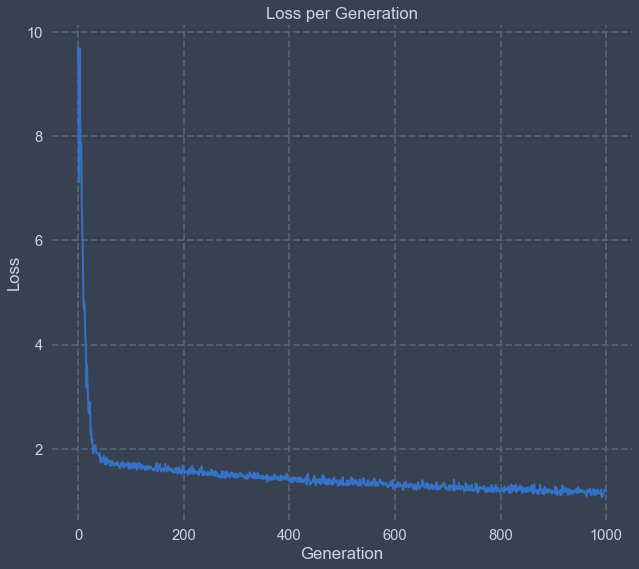

In [0]:
plt.plot(loss_vec, 'b-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()
